In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/codespace/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                           7KB  2022-06-15 08:59:12           8410        278  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)     6MB  2022-06-22 12:51:18           2943        116  1.0              
zusmani/petrolgas-prices-worldwide                        Petrol/Gas Prices Worldwide                        10KB  2022-06-24 01:25:33           2588        122  1.0              
ramjasmaurya/1-gb-internet-price                          Internet Prices around 200+ countries in 2

In [1]:

import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from IPython.display import Image, display

2022-07-31 16:11:36.928547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-31 16:11:36.928576: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import shutil

src_root= '/workspaces/icecream-streamlit-combo/inputimages/'
dest_train = '/workspaces/icecream-streamlit-combo/projdata/train'
dest_test = '/workspaces/icecream-streamlit-combo/projdata/testss'

def copy_images_to_work(brand, cnt):
    
    files = os.listdir(src_root+'/'+brand +'/images')
    i=0
    for f in files:
        
        src = src_root+'/'+brand +'/images/'+f
        i = i + 1
    
        if i <= cnt :
            
            des = dest_train+'/'+brand+'/'+f
     
            if os.path.isfile(des) != True:
                shutil.copyfile(src, des)
                print(des+ '-> copied')
            else:
                print(des+' -> exists')
                
        else:
            
            des = dest_test+'/'+brand+'/'+f
     
            if os.path.isfile(des) != True:
                shutil.copyfile(src, des)  
                print(des+ '-> copied')
            else:
                print(des+' -> exists')

In [12]:
copy_images_to_work('bj',41)
copy_images_to_work('breyers',51)
copy_images_to_work('hd',51)
copy_images_to_work('talenti',31)

/workspaces/icecream-streamlit-combo/projdata/train/bj/12_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/47_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/2_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/27_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/36_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/22_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/54_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/44_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/51_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/48_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/26_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/40_bj.png-> copied
/workspaces/icecream-streamlit-combo/projdata/train/bj/38_bj.png-> copied
/workspaces/icecream-streamlit-combo/pr

In [13]:
LABELS = ['bj','breyers','hd','talenti']
IMG_SIZE = 32

IMG_HEIGHT = IMG_SIZE
IMG_WIDTH  = IMG_SIZE

import cv2

import cv2
def get_data(data_dir):
    data = []
    clas = []
    for label in LABELS: 
        path = os.path.join(data_dir, label)
      
        class_num = LABELS.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (IMG_HEIGHT, IMG_WIDTH)) # Reshaping images to preferred size
                data.append(resized_arr)
                clas.append(class_num)
            except Exception as e:
                print(e)
    #return np.array(data,dtype = "object")
    return data,clas

In [14]:
img_train,clas_train = get_data('/workspaces/icecream-streamlit-combo/projdata/train')

libpng warning: iCCP: known incorrect sRGB profile


In [15]:
img_test,clas_test = get_data('/workspaces/icecream-streamlit-combo/projdata/testss')

(32, 32, 3)


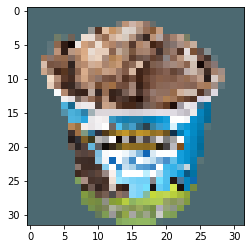

In [16]:
import numpy as np
import matplotlib.pyplot as plt
data = np.asarray(img_train[10])
print(data.shape)
imgplot = plt.imshow(data)
plt.show()

In [17]:
img_train  = np.asarray(img_train)
clas_train = np.asarray(clas_train)
img_test   = np.asarray(img_test)
clas_test  = np.asarray(clas_test)

In [18]:
img_train = img_train / 255.0
img_test = img_test / 255.0

In [19]:
print(img_train.dtype)
print(img_test.dtype)

float64
float64


In [20]:

def make_model():
      model = keras.Sequential([
         keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
         keras.layers.Dense(512, activation='relu'),
         keras.layers.Dense(4)
      ])
      model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
      return model

model=make_model()
#history = model.fit(istrain, isclas, epochs=10)
history = model.fit(img_train,clas_train,epochs = 10 , validation_data = (img_test, clas_test))

2022-07-31 16:16:20.126948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/python/3.10.4/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-31 16:16:20.126978: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-31 16:16:20.126999: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-3b58c1): /proc/driver/nvidia/version does not exist
2022-07-31 16:16:20.127380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
6/6 [==============================] - 1s 33ms/step - loss: 2.5071 - accuracy: 0.3908 - val_loss: 1.8944 - val_accuracy: 0.5385
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.7104 - accuracy: 0.7816 - val_loss: 0.4730 - val_accuracy: 0.8154
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.2279 - accuracy: 0.8966 - val_loss: 0.2734 - val_accuracy: 0.8923
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1149 - accuracy: 0.9540 - val_loss: 0.2593 - val_accuracy: 0.9385
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0261 - accuracy: 0.9885 - val_loss: 0.2758 - val_accuracy: 0.9385
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.2295 - val_accuracy: 0.9385
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2168 - val_accuracy: 0.9385
Epoch 8/10
6/6 [=================

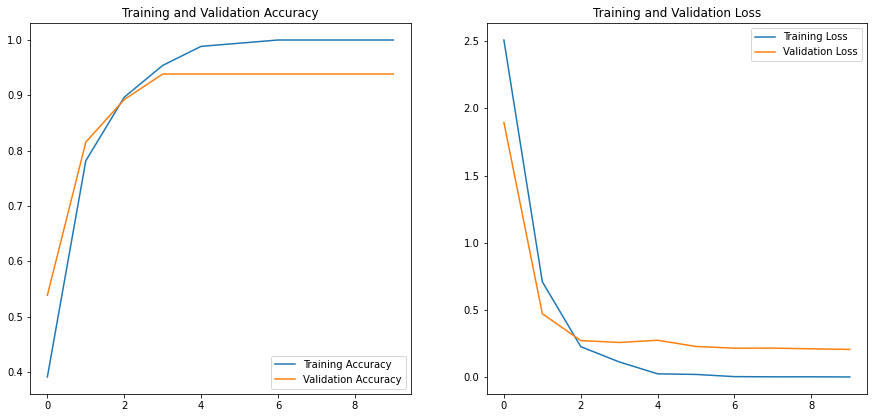

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [22]:
modelname = '/workspaces/icecream-streamlit-combo/modelz/icecream'
#model.save(modelname,save_format='h5')
model.save(modelname)
print('done')

INFO:tensorflow:Assets written to: /workspaces/icecream-streamlit-combo/modelz/icecream/assets
done
